In [1]:
%load_ext dotenv
%dotenv 
import os
import sys
sys.path.append(os.getenv('SRC_DIR'))
from utils.logger import get_logger
_logs = get_logger(__name__)

In [2]:
import dask.dataframe as dd
import pandas as pd
import numpy as np
import os
from glob import glob

c:\Users\jenni\miniconda3\envs\dsi_participant\lib\site-packages\dask\dataframe\__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [3]:
ft_dir = os.getenv("FEATURES_DATA")
ft_glob = glob(os.path.join(ft_dir, '**/*.parquet'), 
               recursive = True)
df = dd.read_parquet(ft_glob).compute().reset_index()

# Sampling in Python

+ There are different packages that allow sampling.
+ A practical approach is to use pandas/Dask sampling methods.

## Random Sampling

+ Sample n rows from a dataframe with [`df.sample()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html).

```
DataFrame.sample(
    n=None, frac=None, replace=False, weights=None, 
    random_state=None, axis=None, ignore_index=False
    )
```

In [4]:
df.sample(n = 5)

,ticker,Date,Open,High,Low,Close,Adj Close,Volume,source,Year,Close_lag_1
307390,TNC,2004-08-19,19.8750,19.879999,19.825001,19.825001,14.701317,9800.0,TNC.csv,2004,19.900
348469,WST,2002-05-20,7.2475,7.247500,7.212500,7.215000,3.968984,30800.0,WST.csv,2002,7.250
18950,AQMS,2018-03-13,2.8700,3.120000,2.750000,2.910000,2.910000,1024000.0,AQMS.csv,2018,2.820
263647,RTTR,2016-01-21,11.8000,14.100000,11.300000,13.600000,13.600000,5500.0,RTTR.csv,2016,12.800
359365,ZIXI,1996-02-26,6.0000,6.125000,6.000000,6.000000,5.944077,16300.0,ZIXI.csv,1996,6.125


In [5]:
import random
random.seed(42)
sample_tickers = random.sample(df['ticker'].unique().tolist(), 30)
df = df[df['ticker'].isin(sample_tickers)]
simple_sample_dt = df.sample(frac = 0.1)
simple_sample_dt.shape, df.shape

((12672, 11), (126720, 11))

Look at the distribution of tickers.

<Axes: xlabel='ticker'>

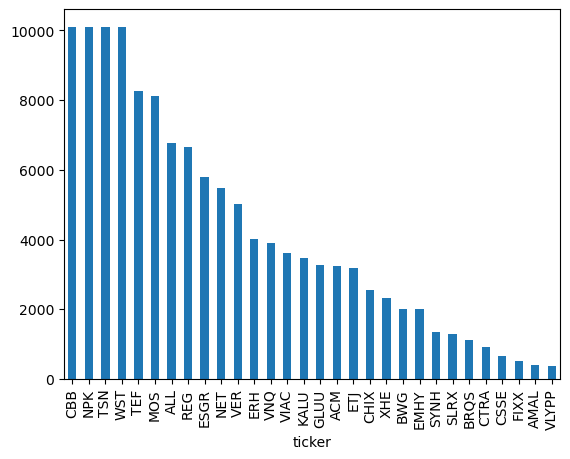

In [6]:
df['ticker'].value_counts().plot(kind='bar')

<Axes: xlabel='ticker'>

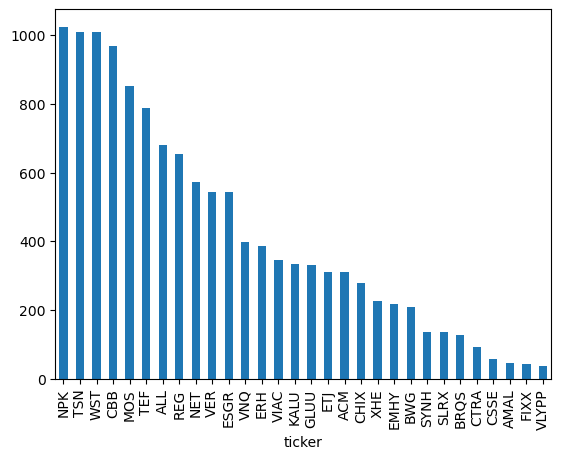

In [7]:
simple_sample_dt['ticker'].value_counts().plot(kind='bar')

## Stratified Sampling

+ Use `groupby()` and `.sample()` for stratified sampling.

<Axes: xlabel='ticker'>

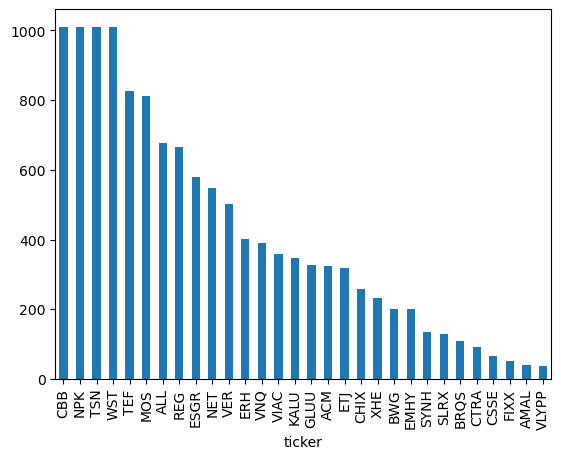

In [8]:
strat_sample_dt = df.groupby(['ticker']).sample(frac = 0.1)
strat_sample_dt['ticker'].value_counts().plot(kind='bar')

# Sampling in Dask

+ Stratified sampling in `dask` can be achieved with `groupby().apply()` and a lambda function.

C:\Users\jenni\AppData\Local\Temp\ipykernel_14696\1783207470.py:2: UserWarning: `meta` is not specified, inferred from partial data. Please provide `meta` if the result is unexpected.
  Before: .apply(func)
  After:  .apply(func, meta={'x': 'f8', 'y': 'f8'}) for dataframe result
  or:     .apply(func, meta=('x', 'f8'))            for series result
  strat_sample_dd = (dd_dt


<Axes: xlabel='ticker'>

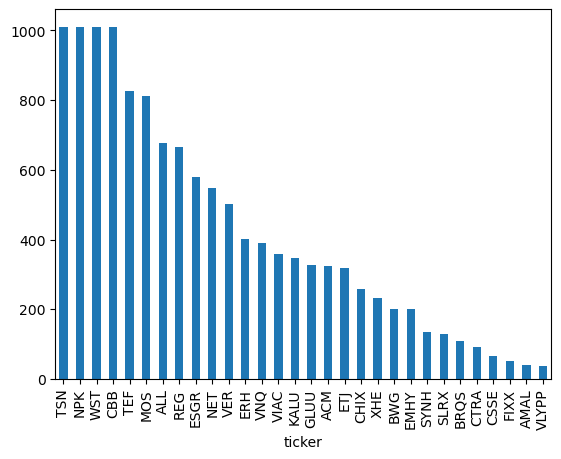

In [9]:
dd_dt = dd.read_parquet(ft_glob)
strat_sample_dd = (dd_dt
                      .groupby('ticker', group_keys=False)
                      .apply(lambda x: x.sample(frac = 0.1))
                      .compute()
                      .reset_index())
strat_sample_dd[strat_sample_dd['ticker'].isin(sample_tickers)]['ticker'].value_counts().plot(kind='bar')